## lynn tinashe zigara R207669D HDSC
### Assignment 1

## if you face any challenges app me 

In [100]:
#!pip install networkx
#the virus

In [68]:
import numpy as np 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import networkx as nx
import matplotlib.pyplot as plt
import argparse
import logging
import random
#import thevirus


The log file comprises 3.3GB of web server logs extracted from zanbil.ir, an Iranian ecommerce platform, offering a comprehensive view of user interactions, crawler activities, and business trends. This log file, compiled by Zaker and Farzin in 2019, is available via Harvard Dataverse for research and analytical purposes.
Dataset Link: [Web Server log file](https://doi.org/10.7910/DVN/3QBYB5)

I extracted relevant information such as client IP, user ID, timestamp, HTTP method, request, status code, size, referer, and user agent from each log line.

In [69]:

log = 'access.log'

# Define the regex pattern to extract information from log lines
regex_pattern = r'^(?P<client>\S+) \S+ (?P<userid>\S+) \[(?P<datetime>[\w:/]+\s[+\-]\d{4})\] "(?P<method>[A-Z]+) (?P<request>[^ "]+)? HTTP/[0-9.]+" (?P<status>[0-9]{3}) (?P<size>[0-9]+|-) "(?P<referer>[^"]*)" "(?P<user_agent>[^"]*)"'

# Define the column names
virus = ['client', 'userid', 'datetime', 'method', 'request', 'status', 'size', 'referer', 'user_agent']

log_data = []
with open(log, 'r') as file:
    for i, line in enumerate(file):
        if i >= 10000:
            break
        match = re.match(regex_pattern, line)
        if match:
            log_data.append({
                'client': match.group('client'),
                'userid': match.group('userid'),
                'datetime': match.group('datetime'),
                'method': match.group('method'),
                'request': match.group('request'),
                'status': match.group('status'),
                'size': match.group('size'),
                'referer': match.group('referer'),
                'user_agent': match.group('user_agent')
            })
        else:
            print("Error: Line does not match regex pattern:", line)


data_logs = pd.DataFrame(log_data, columns=virus)

In [70]:
data_logs

,client,userid,datetime,method,request,status,size,referer,user_agent
0,54.36.149.41,-,22/Jan/2019:03:56:14 +0330,GET,/filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C...,200,30577,-,Mozilla/5.0 (compatible; AhrefsBot/6.1; +http:...
1,31.56.96.51,-,22/Jan/2019:03:56:16 +0330,GET,/image/60844/productModel/200x200,200,5667,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...
2,31.56.96.51,-,22/Jan/2019:03:56:16 +0330,GET,/image/61474/productModel/200x200,200,5379,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...
3,40.77.167.129,-,22/Jan/2019:03:56:17 +0330,GET,/image/14925/productModel/100x100,200,1696,-,Mozilla/5.0 (compatible; bingbot/2.0; +http://...
4,91.99.72.15,-,22/Jan/2019:03:56:17 +0330,GET,/product/31893/62100/%D8%B3%D8%B4%D9%88%D8%A7%...,200,41483,-,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16...
...,...,...,...,...,...,...,...,...,...
9995,5.120.22.214,-,22/Jan/2019:04:36:57 +0330,GET,/blog/home-appliances/%D9%86%DA%A9%D8%A7%D8%AA...,200,24941,https://www.google.com/,Mozilla/5.0 (Linux; Android 5.1.1; SAMSUNG SM-...
9996,192.15.6.66,-,22/Jan/2019:04:36:57 +0330,GET,/product/28237/57015/%D9%87%D9%88%D8%AF-%D8%B2...,302,0,http://api.torob.com/,Mozilla/5.0 (Linux; Android 8.0.0; LG-H990 Bui...
9997,37.129.232.66,-,22/Jan/2019:04:36:57 +0330,GET,/static/images/guarantees/warranty.png,200,5807,https://www.zanbil.ir/m/filter/b785,Mozilla/5.0 (Linux; Android 7.0; RNE-L21 Build...
9998,37.129.232.66,-,22/Jan/2019:04:36:57 +0330,GET,/static/images/guarantees/bestPrice.png,200,7356,https://www.zanbil.ir/m/filter/b785,Mozilla/5.0 (Linux; Android 7.0; RNE-L21 Build...


In [71]:

data_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   client      10000 non-null  object
 1   userid      10000 non-null  object
 2   datetime    10000 non-null  object
 3   method      10000 non-null  object
 4   request     10000 non-null  object
 5   status      10000 non-null  object
 6   size        10000 non-null  object
 7   referer     10000 non-null  object
 8   user_agent  10000 non-null  object
dtypes: object(9)
memory usage: 703.3+ KB


In [72]:
from datetime import datetime
import pytz

In [73]:
# Function to parse the datetime (from the class session practice exercise)
def parse_datetime(x):
  
    try:
        dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
        dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
        return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))
    except ValueError:
        return 'done virus'

In [74]:
data_logs['status'] = data_logs['status'].astype(int)
data_logs['size'] = data_logs['size'].astype(int)
data_logs['datetime'] = data_logs['datetime'].apply(parse_datetime)

In [75]:
#Dropping the userid column
users = data_logs['userid'].unique()
print(users)

['-']


In [76]:
data_logs.drop(columns=['userid'], inplace=True)

In [77]:
#Dropping duplicates
# Count duplicates in the dataframe
duplicate_count = data_logs.duplicated().sum()

# Display the count of duplicates
print("Number of duplicates:", duplicate_count)

# Drop the duplicates
data_logs = data_logs.drop_duplicates()

Number of duplicates: 49


### 1. Find 10 people who visited the site frequently, show the information that identifies the people and state why you identify these people as frequent visitors. [5 ]

In [78]:
# Group by client and user_agent, count occurrences, and sort in descending order
frequent_visitors = data_logs.groupby(['client', 'user_agent']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Select the top 10 frequent visitors
top_10 = frequent_visitors.head(10)

index = 0
# Display the top 10 frequent visitors
for i, row in top_10.iterrows():
    print(f"{index + 1}. Client: {row['client']}, User Agent: {row['user_agent']}, Count: {row['count']}\n")
    index += 1

1. Client: 66.249.66.194, User Agent: Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.96 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html), Count: 778

2. Client: 66.249.66.91, User Agent: Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html), Count: 739

3. Client: 130.185.74.243, User Agent: Mozilla/5.0 (Windows NT 6.1; rv:42.0) Gecko/20100101 Firefox/42.0, Count: 660

4. Client: 66.249.66.194, User Agent: Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html), Count: 558

5. Client: 5.211.97.39, User Agent: Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like Mac OS X) AppleWebKit/603.2.4 (KHTML, like Gecko) Version/10.0 Mobile/14F89 Safari/602.1, Count: 474

6. Client: 207.46.13.136, User Agent: Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm), Count: 416

7. Client: 194.94.127.7, User Agent: Mozilla/5.0 (Windows NT 6.1; Win64; x64)

### 2. Show at least five sessions and the page views per each session. [5 ]

In [79]:
# Group by client and user_agent to identify sessions and count page views per session
sessions = data_logs.groupby(['client', 'user_agent'])

# Initialize empty lists to store session information
session_info = []

# Iterate over each session
for (client, user_agent), session_data in sessions:
    # Extract timestamps and page views for the session
    timestamps = session_data['datetime'].tolist()
    pages = session_data['request'].tolist()
    
    # Store session information in a tuple
    session_info.append((client, user_agent, timestamps, pages))

In [80]:
session_info[1:6]

[('104.194.24.33',
  'Mozilla/5.0 (Linux; Android 8.0.0; SM-G955F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36',
  [Timestamp('2019-01-02 03:57:00+0033', tz='pytz.FixedOffset(33)')],
  ['/amp-helper-frame.html?appId=a624a1c1-0c93-466a-a546-e146710f97e6&parentOrigin=https://www-zanbil-ir.cdn.ampproject.org']),
 ('104.194.24.54',
  'Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G900H Build/MMB29K)',
  [Timestamp('2019-01-02 04:24:00+0033', tz='pytz.FixedOffset(33)'),
   Timestamp('2019-01-02 04:26:04+0033', tz='pytz.FixedOffset(33)')],
  ['/image/33888?name=model-b2048u-1-.jpg&wh=200x200',
   '/image/11947?name=11947-1-fw.jpg&wh=200x200']),
 ('104.194.25.207',
  'Dalvik/2.1.0 (Linux; U; Android 5.0.2; P01V Build/LRX22G)',
  [Timestamp('2019-01-02 04:06:04+0033', tz='pytz.FixedOffset(33)'),
   Timestamp('2019-01-02 04:06:05+0033', tz='pytz.FixedOffset(33)'),
   Timestamp('2019-01-02 04:06:05+0033', tz='pytz.FixedOffset(33)')],
  ['/image/33888?name=model-b2

In [81]:
# Display at least five sessions and their page views per session
for i, (client, user_agent, timestamps, pages) in enumerate(session_info[:5], start=1):
    print(f"Session {i} - Client: {client}, User Agent: {user_agent}")
    for timestamp, page in zip(timestamps, pages):
        print(f"    Timestamp: {timestamp}, Page: {page}")
    print()

Session 1 - Client: 104.156.210.196, User Agent: Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-A720F Build/R16NW)
    Timestamp: 2019-01-02 04:20:00+00:33, Page: /image/32768?name=24xs450-33.jpg&wh=200x200

Session 2 - Client: 104.194.24.33, User Agent: Mozilla/5.0 (Linux; Android 8.0.0; SM-G955F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36
    Timestamp: 2019-01-02 03:57:00+00:33, Page: /amp-helper-frame.html?appId=a624a1c1-0c93-466a-a546-e146710f97e6&parentOrigin=https://www-zanbil-ir.cdn.ampproject.org

Session 3 - Client: 104.194.24.54, User Agent: Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G900H Build/MMB29K)
    Timestamp: 2019-01-02 04:24:00+00:33, Page: /image/33888?name=model-b2048u-1-.jpg&wh=200x200
    Timestamp: 2019-01-02 04:26:04+00:33, Page: /image/11947?name=11947-1-fw.jpg&wh=200x200

Session 4 - Client: 104.194.25.207, User Agent: Dalvik/2.1.0 (Linux; U; Android 5.0.2; P01V Build/LRX22G)
    Timestamp: 2019-01-02 04:06:04+00:33, Page: /im

In [82]:
SESSION_THRESHOLD_SECONDS = 10 * 60

# Sort the logs_df by client, user_agent, and datetime
logs_df_sorted = data_logs.sort_values(by=['client', 'user_agent', 'datetime'])

# Initialize empty lists to store session information
session_info = []

# Initialize variables for tracking sessions
current_client = None
current_user_agent = None
current_session_start = None
current_session_end = None
current_session_pages = []

# Iterate over each row in the sorted DataFrame
for index, row in logs_df_sorted.iterrows():
    # Check if the client or user_agent has changed, or if the time gap exceeds the threshold
    if (row['client'] != current_client or row['user_agent'] != current_user_agent or
            (current_session_start and (row['datetime'] - current_session_end).seconds > SESSION_THRESHOLD_SECONDS)):
        # If so, store the current session information
        if current_session_start:
            session_info.append((current_client, current_user_agent, current_session_start, current_session_end, current_session_pages))
            # Check if we have at least five sessions, if so, break the loop
            if len(session_info) >= 5:
                break
        
        # Start a new session
        current_client = row['client']
        current_user_agent = row['user_agent']
        current_session_start = row['datetime']
        current_session_end = row['datetime']
        current_session_pages = [(row['datetime'], row['request'])]
    else:
        # Otherwise, add the page to the current session
        current_session_pages.append((row['datetime'], row['request']))
        # Update session end time
        current_session_end = row['datetime']

# Display session information for at least five sessions
index = 0
for session in session_info:
    print(f"Session {index+1}")
    print("Client:", session[0])
    print("User Agent:", session[1])
    print("Session Start Time:", session[2])
    print("Session End Time:", session[3])
    print("Pages Visited:")
    for timestamp, page in session[4]:
        print(f"    {timestamp}: {page}")
    index +=1
    print("\n\n")

Session 1
Client: 104.156.210.196
User Agent: Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-A720F Build/R16NW)
Session Start Time: 2019-01-02 04:20:00+00:33
Session End Time: 2019-01-02 04:20:00+00:33
Pages Visited:
    2019-01-02 04:20:00+00:33: /image/32768?name=24xs450-33.jpg&wh=200x200



Session 2
Client: 104.194.24.33
User Agent: Mozilla/5.0 (Linux; Android 8.0.0; SM-G955F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36
Session Start Time: 2019-01-02 03:57:00+00:33
Session End Time: 2019-01-02 03:57:00+00:33
Pages Visited:
    2019-01-02 03:57:00+00:33: /amp-helper-frame.html?appId=a624a1c1-0c93-466a-a546-e146710f97e6&parentOrigin=https://www-zanbil-ir.cdn.ampproject.org



Session 3
Client: 104.194.24.54
User Agent: Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G900H Build/MMB29K)
Session Start Time: 2019-01-02 04:24:00+00:33
Session End Time: 2019-01-02 04:26:04+00:33
Pages Visited:
    2019-01-02 04:24:00+00:33: /image/33888?name=model-b2048u-1-.jpg&wh

In [83]:
# Create a session dataframe from the session info array
session_df = pd.DataFrame(session_info)
# Set the columns
session_df.columns = ['client', 'user_agent', 'start_time', 'end_time',  'pages']
# Extract only the pages from the virus
session_df['pages'] = session_df['pages'].apply(lambda x: [page[1] for page in x])

In [84]:
# Diplaying the first 2 rows of the dataframe
session_df.head(5)

,client,user_agent,start_time,end_time,pages
0,104.156.210.196,Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-A720...,2019-01-02 04:20:00+00:33,2019-01-02 04:20:00+00:33,[/image/32768?name=24xs450-33.jpg&wh=200x200]
1,104.194.24.33,Mozilla/5.0 (Linux; Android 8.0.0; SM-G955F) A...,2019-01-02 03:57:00+00:33,2019-01-02 03:57:00+00:33,[/amp-helper-frame.html?appId=a624a1c1-0c93-46...
2,104.194.24.54,Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G900...,2019-01-02 04:24:00+00:33,2019-01-02 04:26:04+00:33,[/image/33888?name=model-b2048u-1-.jpg&wh=200x...
3,104.194.25.207,Dalvik/2.1.0 (Linux; U; Android 5.0.2; P01V Bu...,2019-01-02 04:06:04+00:33,2019-01-02 04:06:05+00:33,[/image/33888?name=model-b2048u-1-.jpg&wh=200x...
4,104.248.138.218,Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_2 like...,2019-01-02 04:35:01+00:33,2019-01-02 04:36:02+00:33,[/m/browse/sewing-machine/%DA%86%D8%B1%D8%AE-%...


### 3. Show five frequent pages which the users visit before visiting this particular website. [5 ]

In [85]:
from urllib.parse import urlparse

# Drop rows where 'referer' is NaN
referer_df = data_logs.dropna(subset=['referer'])

# Filter out URLs that are not well-formed
referer_df = referer_df[referer_df['referer'].apply(lambda x: re.match(r'^https?://', x) is not None)]

# Parse the referer URLs to extract the base URL
referer_df['base_url'] = referer_df['referer'].apply(lambda x: urlparse(x.replace('"', '')).scheme + "://" + urlparse(x.replace('"', '')).netloc)

# Find the top 5 frequent referrer websites
counting_referer_occurence = referer_df['base_url'].value_counts().sort_values(ascending=False)

# Get top 5
top_5_referers = counting_referer_occurence.head(5)

# Display the top 5 frequent referrer websites from the virus
for i, (referer, count) in enumerate(top_5_referers.items(), start=1):
    print(f"{i}. {referer} - Count: {count}")

1. https://www.zanbil.ir - Count: 3886
2. https://znbl.ir - Count: 141
3. https://torob.com - Count: 91
4. https://www-zanbil-ir.cdn.ampproject.org - Count: 72
5. http://www.zanbil.ir - Count: 50


### 4. Using the apriori algorithm show the web pages that are frequently visited together with a support ratio not less than 25%.

In [86]:
#!pip install mlxtend --upgrade

In [87]:
## here we are using the dataframe with the sessions grouped because for the pages to be said they are frequently visited together, they must be in the same session.
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert pages visited per session into a list of lists format
pages_accessed = session_df['pages'].tolist()

# Initialize TransactionEncoder
te = TransactionEncoder()

# Fit and transform the data into a one-hot encoded DataFrame
onehot = te.fit_transform(pages_accessed)

# Convert the one-hot encoded DataFrame into a DataFrame
df = pd.DataFrame(onehot, columns=te.columns_)

# Find frequent itemsets using Apriori with minimum support of 0.25
frequent_itemsets = apriori(df, min_support=0.25, use_colnames=True)

In [88]:
# Filter frequent itemsets to include only those with more than 1 items
filter_frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x)) > 1]
# Display frequent itemsets
print("Frequent Itemsets:")
filter_frequent_itemsets

Frequent Itemsets:


,support,itemsets
2,0.4,(/image/33888?name=model-b2048u-1-.jpg&wh=200x...


### 5. Show the association rules with lift values not less than 2.05 [5 ]

In [89]:
# Getting the rules with the lift above 2.05
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=2.05)

In [90]:
# Displaying rules in a formatted manner
print("Association Rules with Lift > 2.05:\n")
for index, rule in rules.iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    support = rule['support']
    confidence = rule['confidence']
    lift = rule['lift']
    print(f"Rule {index+1}: {antecedents} -> {consequents}")
    print(f"Support: {support:.4f}, Confidence: {confidence:.4f}, Lift: {lift:.4f}\n")

Association Rules with Lift > 2.05:

Rule 1: /image/33888?name=model-b2048u-1-.jpg&wh=200x200 -> /image/11947?name=11947-1-fw.jpg&wh=200x200
Support: 0.4000, Confidence: 1.0000, Lift: 2.5000

Rule 2: /image/11947?name=11947-1-fw.jpg&wh=200x200 -> /image/33888?name=model-b2048u-1-.jpg&wh=200x200
Support: 0.4000, Confidence: 1.0000, Lift: 2.5000



### 6. Find at least ten frequent sequential patterns or navigational patterns which the users follow using the GSP algorithm, state your own support value and maximum length of item_set. [5]

In [91]:
#The GSP algorithm identifies patterns that occur frequently among user navigation sequences, which helps to understand common browsing behaviors.
#!pip install gsppy

In [92]:

from gsppy.gsp import GSP
logging.basicConfig(level=logging.DEBUG)

In [93]:
result = GSP(pages_accessed).search(0.25)


DEBUG:root:
        Run 1
        There are 14 candidates.
        The candidates have been filtered down to 2.

DEBUG:root:
        Run 2
        There are 4 candidates.
        The candidates have been filtered down to 1.

DEBUG:root:
        Run 3
        There are 8 candidates.
        The candidates have been filtered down to 0.



In [94]:
result

[{('/image/11947?name=11947-1-fw.jpg&wh=200x200',): 2,
  ('/image/33888?name=model-b2048u-1-.jpg&wh=200x200',): 2},
 {('/image/33888?name=model-b2048u-1-.jpg&wh=200x200',
   '/image/11947?name=11947-1-fw.jpg&wh=200x200'): 2}]

In [95]:
max_length = 3
# Filter out frequent sequential patterns based on maximum length
filtered_patterns = [pattern for pattern in result if len(pattern) <= max_length]

# Display the frequent sequential patterns
for pattern in filtered_patterns:
    print(pattern)

{('/image/11947?name=11947-1-fw.jpg&wh=200x200',): 2, ('/image/33888?name=model-b2048u-1-.jpg&wh=200x200',): 2}
{('/image/33888?name=model-b2048u-1-.jpg&wh=200x200', '/image/11947?name=11947-1-fw.jpg&wh=200x200'): 2}


### 7. Create a graph that shows clusters of users with similar navigational patterns.[5 ]

In [96]:
# Setting patterns into a suitable format for analysis
patterns = onehot

# Cluster users using K-means
kmeans = KMeans(n_clusters=3,  n_init=10)
clusters = kmeans.fit_predict(patterns)

c:\Users\Tinashe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001DE4D3E0A10>


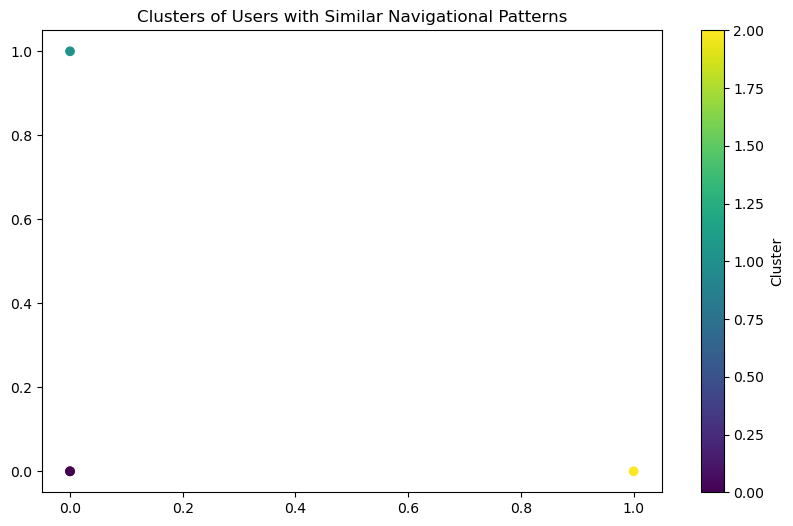

In [97]:
# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(patterns[:, 0], patterns[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters of Users with Similar Navigational Patterns')
plt.colorbar(label='Cluster')
plt.show()

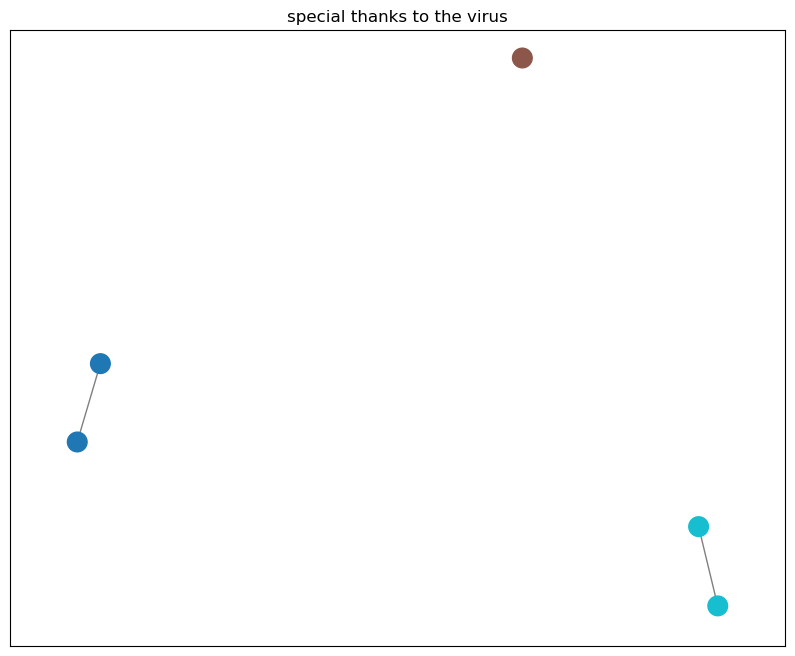

In [98]:
# Create a graph
G = nx.Graph()

# Add nodes (users) to the graph
for i in range(len(patterns)):
    # Assign cluster as a node attribute
    G.add_node(i, label=f"User {i}", cluster=clusters[i])  

# Add edges between similar users (in the same cluster)
for i in range(len(patterns)):
    for j in range(i + 1, len(patterns)):
        if clusters[i] == clusters[j]:
            G.add_edge(i, j)

# Visualize the graph
plt.figure(figsize=(10, 8))
# Layout for the graph
pos = nx.spring_layout(G)  

# Draw nodes colored by cluster
node_color = [clusters[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap=plt.cm.tab10, node_size=200)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title('special thanks to the virus')
# plt.axis('off')
plt.show()